<h3>C.</h3>
Implement a Python algorithm that performs the same task above for arbitrary functions and arbitrary interpolation points. The algorithm only returns the value of the
interpolated function in an array of points which is given as input. What is the maximal
error ð‘’ (ð‘¥) = |ð‘“ (ð‘¥) âˆ’ ð‘(ð‘¥)| on the intervals [âˆ’1, 2] and [âˆ’5, 5]? Plot ð‘“ (ð‘¥) and ð‘(ð‘¥) in
the same plot, on the interval [âˆ’1, 2].


<h3>D.</h3>
The sequence of Chebyshev nodes on the reference interval \([-1,1]\) is:

\[
z_k = \cos \left( \frac{\pi(2k + 1)}{2n} \right) \quad \text{where} \quad z_k \in [-1,1], \quad k = 0, \dots, n - 1
\]

And it can be transported to a general interval \([a, b]\) using:

\[
x_k = \frac{a + b}{2} + \frac{b - a}{2} z_k
\]

Find the Chebyshev nodes on the interval \([-1, 2]\) for \( n = 3 \).

Max error on [-1, 2]: 4.440892098500626e-16
Max error on [-5, 5]: 3.197442310920451e-14


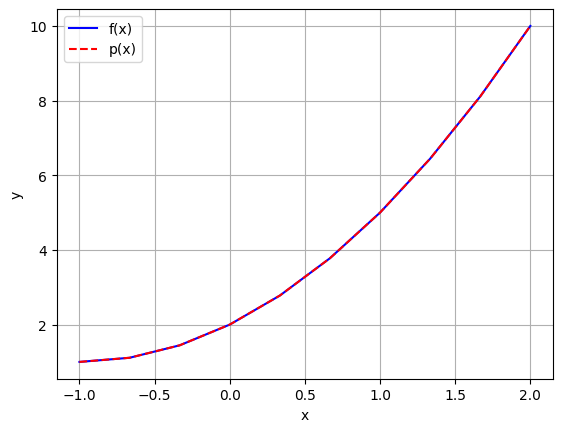

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x, x_values, y_values):
    n = len(x_values)
    P = 0
    for j in range(n):
        L_j = 1
        for m in range(n):
            if m != j:
                L_j *= (x - x_values[m]) / (x_values[j] - x_values[m])
        P += y_values[j] * L_j
    return P


# Arbitrary function
def f(x):
    return x**2+2*x+2

x_values = [-1, 0, 1, 2]
y_values = [f(x) for x in x_values]

r1 = np.linspace(-1, 2, 10)
r2 = np.linspace(-5, 5, 10)

# Interpolated function
p1 = [lagrange_interpolation(x, x_values, y_values) for x in r1]
# Exact function
f1 = [f(x) for x in r1]
# Error
e1 = np.abs(np.array(p1) - np.array(f1))

# Interpolated function
p2 = [lagrange_interpolation(x, x_values, y_values) for x in r2]
# Exact function
f2 = [f(x) for x in r2]
# Error
e2 = np.abs(np.array(p2) - np.array(f2))

# Max errors
max_e1 = np.max(e1)
max_e2 = np.max(e2)

print("Max error on [-1, 2]:", max_e1)
print("Max error on [-5, 5]:", max_e2)

plt.plot(r1, f1, label="f(x)", color="blue")
plt.plot(r1, p1, label="p(x)", color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

<h3>E.</h3>
Interpolate ð‘“ (ð‘¥) numerically in the Chebyshev nodes for ð‘› = 3. What is the maximal
error on the intervals [âˆ’1, 2] and [âˆ’5, 5]? Plot ð‘“ (ð‘¥) and the interpolating polynomial
in the same plot, on the interval [âˆ’1, 2].


[0.8660254037844387, 6.123233995736766e-17, -0.8660254037844387]
Max error using Chebyshev nodes on [-1, 2]: 1.7763568394002505e-15
Max error using Chebyshev nodes on [-5, 5]: 1.4210854715202004e-14


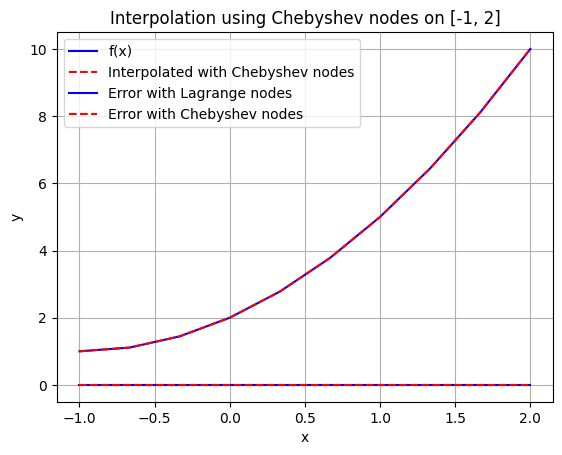

In [48]:
import numpy as np

n = 3
z_k = [np.cos(np.pi * (2*k + 1) / (2*n)) for k in range(n)]
print(z_k)

a, b = -1, 2
x_k = [(a + b) / 2 + (b - a) / 2 * z for z in z_k]

y_k = [f(x) for x in x_k]

r1_c = np.linspace(-1, 2, 10)
r2_c = np.linspace(-5, 5, 10)

p1_c = [lagrange_interpolation(x, x_k, y_k) for x in r1_c]
f1_c = [f(x) for x in r1_c]
e1_c = np.abs(np.array(p1_c) - np.array(f1_c))

p2_c = [lagrange_interpolation(x, x_k, y_k) for x in r2_c]
f2_c = [f(x) for x in r2_c]
e2_c = np.abs(np.array(p2_c) - np.array(f2_c))

max_e1_c = np.max(e1_c)
max_e2_c = np.max(e2_c)

print("Max error using Chebyshev nodes on [-1, 2]:", max_e1_c)
print("Max error using Chebyshev nodes on [-5, 5]:", max_e2_c)

# Plot
plt.figure()
plt.plot(r1_c, f1_c, label="f(x)", color="blue")
plt.plot(r1_c, p1_c, label="Interpolated with Chebyshev nodes", color="red", linestyle="--")
plt.plot(r1, e1, label="Error with Lagrange nodes", color="blue", linestyle="-")
plt.plot(r1_c, e1_c, label="Error with Chebyshev nodes", color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolation using Chebyshev nodes on [-1, 2]")
plt.legend()
plt.grid(True)
plt.show()



<h3>F.</h3>
Plot the error as a function in ð‘¥, for both interpolations (Lagrange and Chebyshev), on
the interval [âˆ’1, 2]. Plot both errors in the same plot.


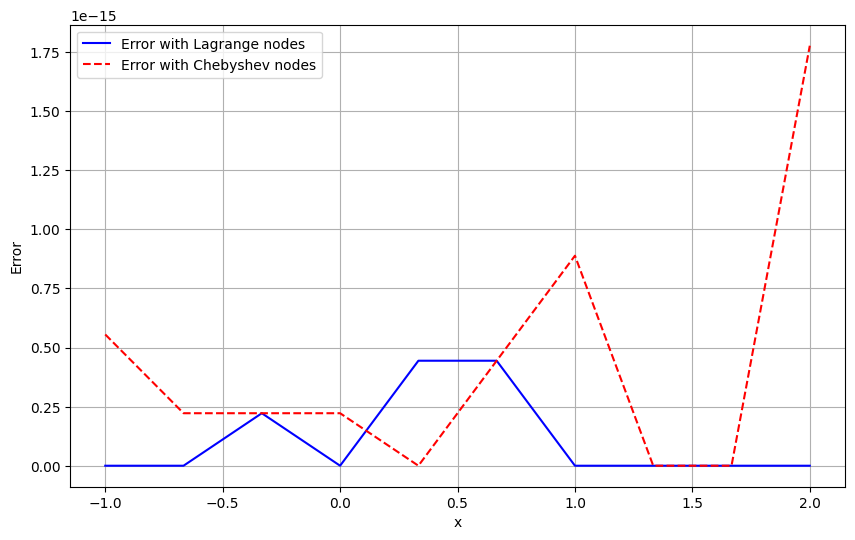

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(r1, e1, label="Error with Lagrange nodes", color="blue", linestyle="-")
plt.plot(r1_c, e1_c, label="Error with Chebyshev nodes", color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()